## Introducción

In [2]:
import numpy as np
import pandas as pd

In [55]:
df=pd.read_csv('00 - datasets/preprocesado.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Exploración y conteo con size, shape y ndim

Inserción de nan y uso de dropna en varias circunstancias

Conteos con varias funciones de conteo, explorar instalación de sidetable

Extración de columnas e indices

Ordenaciones por columna

Ordenaciones por indice

Añadir una columna de continente

Hacer una tabla dinamica

<AxesSubplot:ylabel='Country'>

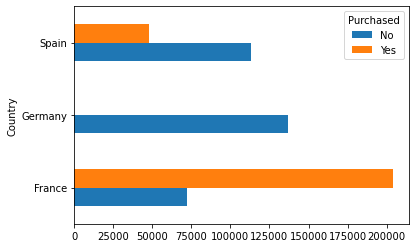

In [60]:
df.pivot_table(values='Salary', index='Country', columns='Purchased', aggfunc=np.sum).plot.barh()

## Preprocesado

In [30]:
df=pd.read_csv('00 - datasets/01 - Basic.csv')
df

,InvoiceNumber,SalesDate,ProductName,UnitsSold,SalesValue,ShippingCost,SalesPeople,ShipToCity,ShipToCountry
0,123,1/1/2014,Apples,1,0.45,10,Chris,London,UK
1,124,1/1/2014,Oranges,2,0.60,20,"Chris,Helen",Washington DC,USA
2,125,2/2/2014,Apples,2,0.90,20,HELEN,Dublin,Ireland
3,126,2/2/2014,Oranges,1,0.30,10,Helen,Paris,France
4,Invoice127,3/3/2014,Pears,5,1.00,40,Chris,Berlin,Germany
5,128,3/3/2014,Apples,3,1.20,30,"CHRIS,Natasha",Zurich,Switzerland
6,129,3/3/2014,Oranges,3,0.90,30,"Chris,Mimi",Oslo,Norway
7,129,3/3/2014,Oranges,3,0.90,30,"chris,mimi",Oslo,Norway
8,130,3/4/2014,Grapes,1,2.00,100,"Helen,Natasha",Oslo,NaN
9,131,4/4/2014,Apples,1,0.45,10,Chris,London,NaN


In [62]:
df.dtypes

InvoiceNumber             int32
SalesDate        datetime64[ns]
ProductName              object
UnitsSold                 int64
SalesValue              float64
ShippingCost              int64
ShipToCity               object
ShipToCountry            object
SalesPeople00            object
SalesPeople01            object
dtype: object

Eliminar Invoice de la primera columna

In [64]:
df = pd.read_csv('00 - datasets/01 - Basic.csv')
df['InvoiceNumber'] = df['InvoiceNumber'].str.slice(-3).astype('int')
df[['SalesPeople', 'ShipToCity', 'ShipToCountry']] = df[['SalesPeople',
                                        'ShipToCity', 'ShipToCountry']].apply(lambda x: x.str.upper())
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
nuevacolumna = df['SalesPeople'].str.split(',', n=2, expand=True)
df['SalesPeople00'] = nuevacolumna[0].astype('str')
df['SalesPeople01'] = nuevacolumna[1]
df.drop('SalesPeople', axis=1, inplace=True)

df.sort_values(by=['ShipToCity', 'ShipToCountry'], inplace=True)
df.fillna(method='ffill', inplace=True)
df

,InvoiceNumber,SalesDate,ProductName,UnitsSold,SalesValue,ShippingCost,ShipToCity,ShipToCountry,SalesPeople00,SalesPeople01
4,127,2014-03-03,Pears,5,1.00,40,BERLIN,GERMANY,CHRIS,None
2,125,2014-02-02,Apples,2,0.90,20,DUBLIN,IRELAND,HELEN,None
0,123,2014-01-01,Apples,1,0.45,10,LONDON,UK,CHRIS,None
9,131,2014-04-04,Apples,1,0.45,10,LONDON,UK,CHRIS,None
6,129,2014-03-03,Oranges,3,0.90,30,OSLO,NORWAY,CHRIS,MIMI
7,129,2014-03-03,Oranges,3,0.90,30,OSLO,NORWAY,CHRIS,MIMI
8,130,2014-03-04,Grapes,1,2.00,100,OSLO,NORWAY,HELEN,NATASHA
3,126,2014-02-02,Oranges,1,0.30,10,PARIS,FRANCE,HELEN,NATASHA
1,124,2014-01-01,Oranges,2,0.60,20,WASHINGTON DC,USA,CHRIS,HELEN
5,128,2014-03-03,Apples,3,1.20,30,ZURICH,SWITZERLAND,CHRIS,NATASHA


Asegurar tipo fecha en la segunda columna

Uniformizar tipos en SalesPeople

Separar en columnas por coma en SalesPeople

Rellenar hacia abajo País en ShipToCountry

Unpivotar SalesPeople 1 y 2 en una unica columna

Aplicar Encadenado de metodos

In [69]:
df = (pd.read_csv('00 - datasets/01 - Basic.csv')
    .rename(columns=lambda x: x.strip()) # quito espacios en los nombres de columna
    .assign(InvoiceNumber=lambda x: x['InvoiceNumber'].str.slice(-3).astype('int'), # ajusto columnas y tipos
              SalesDate=lambda x: pd.to_datetime(x['SalesDate']),
              SalesPeople=lambda x: x['SalesPeople'].str.upper(),
              ShipToCity=lambda x: x['ShipToCity'].str.upper(),
              ShipToCountry=lambda x: x['ShipToCountry'].str.upper(),
              SalesPeople00=lambda x: x['SalesPeople'].str.split(',', n=2, expand=True)[0],
              SalesPeople01=lambda x: x['SalesPeople'].str.split(',', n=2, expand=True)[1])
    .drop('SalesPeople', axis=1) # elimino la columna separada
    .sort_values(by=['ShipToCity', 'ShipToCountry']) # ordeno
    .fillna(method='ffill') # copio hacia abajo
)
df.pivot_table(values=['SalesValue'], index=['ProductName'], columns=['ShipToCountry'], aggfunc=np.sum, fill_value=0)

SalesValue                                             
ShipToCountry     FRANCE GERMANY IRELAND NORWAY SWITZERLAND   UK  USA
ProductName                                                          
Apples               0.0       0     0.9    0.0         1.2  0.9  0.0
Grapes               0.0       0     0.0    2.0         0.0  0.0  0.0
Oranges              0.3       0     0.0    1.8         0.0  0.0  0.6
Pears                0.0       1     0.0    0.0         0.0  0.0  0.0

## Pivotar y unpivotar

In [71]:
df=pd.read_excel('00 - datasets/01 - ParquesNacionales.xlsx')
df

,Parque,2.001,2.002,2.003,2.004,2.005,2.006,2.007,2.008,2.009,2.010,2.011
0,Great Smoky Mountains NP,9197697,9316420,9366845,9167046,9192477,9289215,9372253,9044010,9491437,9463538,9008830
1,Grand Canyon NP,4104809,4001974,4124900,4326234,4401522,4279439,4413668,4425314,4348068,4388386,4298178
2,Olympic NP,3416069,3691310,3225327,3073722,3142774,2749197,2988686,3081451,3276459,2844563,2966502
3,Yosemite NP,3368731,3361867,3378664,3280911,3304144,3242644,3503428,3431514,3737472,3901408,3951393
4,Rocky Mountain NP,3139685,2988475,3067256,2781899,2798368,2743676,2895383,2757390,2822325,2955821,3176941
5,Cuyahoga Valley NP,3123353,3217935,2879591,3306175,2533827,2468816,2486656,2828233,2589288,2492670,2161185
6,Yellowstone NP,2758526,2973677,3019375,2868317,2835651,2870295,3151343,3066580,3295187,3640185,3394326
7,Grand Teton NP,2535108,2612629,2355693,2360373,2463442,2406476,2588574,2485987,2580081,2669374,2587437
8,Acadia NP,2516551,2558572,2431062,2207847,2051484,2083588,2202228,2075857,2227698,2504208,2374645
9,Zion NP,2217779,2592545,2458792,2677342,2586665,2567350,2657281,2690154,2735402,2665972,2825505


Unpivotar la tabla

In [51]:
df = pd.melt(df, id_vars='Parque')

Ordenar correctamente por parque y año

In [55]:
df['Acumulado'] = df.value.cumsum()
df

,Parque,variable,value,Acumulado
0,Great Smoky Mountains NP,2.001,9197697,9197697
1,Grand Canyon NP,2.001,4104809,13302506
2,Olympic NP,2.001,3416069,16718575
3,Yosemite NP,2.001,3368731,20087306
4,Rocky Mountain NP,2.001,3139685,23226991
...,...,...,...,...
314,Saguaro NP,2.011,610045,611677060
315,Virgin Islands NP,2.011,442414,612119474
316,Wind Cave NP,2.011,538394,612657868
317,Petrified Forest NP,2.011,614054,613271922
